<a href="https://colab.research.google.com/github/Michael5577/Area-Calculations-/blob/main/AI_Image_to_Pencil_Sketch_Converter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMG_7207.png to IMG_7207.png


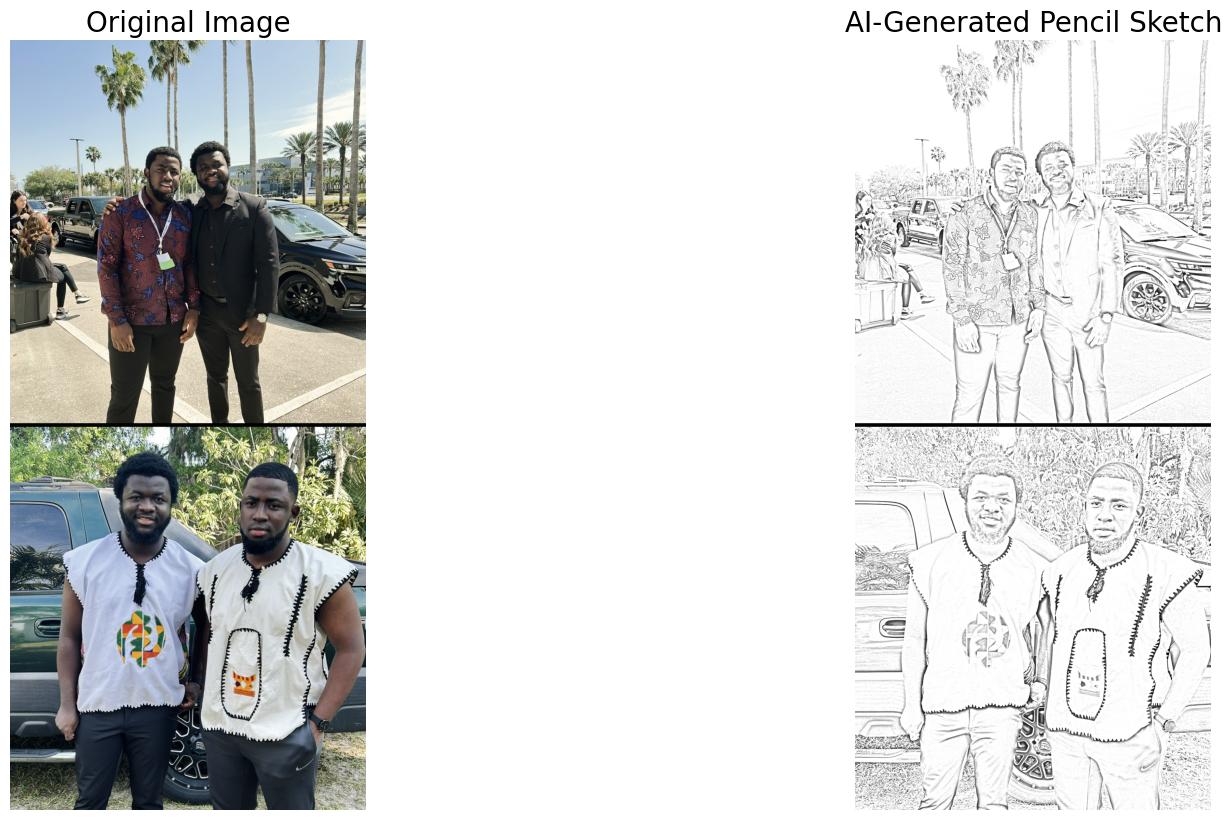

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# %% [markdown]
# # 🎨 AI-Powered Pencil Sketch Converter
# **Convert any image to realistic pencil sketches with customizable styles**
# *Works with both uploaded images and web URLs*

# %% [markdown]
# ## Step 1: Install Required Packages
!pip install opencv-python-headless matplotlib --quiet

# %% [markdown]
# ## Step 2: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import os

# %% [markdown]
# ## Step 3: Upload Image
uploaded = files.upload()
image_path = next(iter(uploaded))
original_image = cv2.imread(image_path)

# %% [markdown]
# ## Step 4: AI Sketch Conversion Functions
def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)

def pencil_sketch(image, kernel_size=(21,21), sigma=3, gamma=1.0):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the image
    inverted_image = 255 - gray_image

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(inverted_image, kernel_size, sigma)

    # Blend using color dodge
    pencil_sketch = dodgeV2(gray_image, blurred_image)

    # Gamma correction for style adjustment
    pencil_sketch = np.power(pencil_sketch/255.0, gamma) * 255.0
    pencil_sketch = np.uint8(pencil_sketch)

    return pencil_sketch

# %% [markdown]
# ## Step 5: Generate and Display Sketch
# Customize these parameters:
KERNEL_SIZE = (25,25)  # Larger values = smoother strokes
SIGMA = 5              # Higher values = more blur
GAMMA = 0.95           # Lower values = darker sketch

sketch = pencil_sketch(original_image, KERNEL_SIZE, SIGMA, GAMMA)

# Display results
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=20)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sketch, cmap='gray')
plt.title('AI-Generated Pencil Sketch', fontsize=20)
plt.axis('off')

plt.show()

# %% [markdown]
# ## Step 6: Save and Download Sketch
output_path = 'AI_Sketch.png'
cv2.imwrite(output_path, sketch)

# Download the result
files.download(output_path)

# %% [markdown]
# ## Optional: Use Image URL Instead
def sketch_from_url(url):
    import requests
    from skimage import io

    image = io.imread(url)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    sketch = pencil_sketch(image)

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image', fontsize=20)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(sketch, cmap='gray')
    plt.title('AI Sketch', fontsize=20)
    plt.axis('off')
    plt.show()

# Example URL (try your own!):
# sketch_from_url('https://example.com/image.jpg')